# **Априорный алгоритм в мире Классификации:**

**Цель и область применения:**
Априорный алгоритм - это метод классификации, который учитывает априорные вероятности принадлежности объектов к классам. Его задача - принимать решения о классификации нового объекта, учитывая предварительные знания о вероятностях принадлежности к классам.

**Где можно использовать:**
- **Медицинская диагностика:** Оценка вероятности наличия болезни у пациента.
- **Финансовая аналитика:** Прогноз вероятности успешности инвестиций.
- **Рекомендательные системы:** Предсказание интересов пользователя на основе предварительных знаний.

**Алгоритм:**

1. **Априорные вероятности:**
   - Задаются вероятности принадлежности объектов к каждому классу до учета признаков объекта.

2. **Вероятностные модели:**
   - Задаются вероятности появления каждого признака в каждом классе.

3. **Поступление нового объекта:**
   - Для нового объекта x вычисляются вероятности принадлежности к каждому классу по формуле Байеса.

4. **Классификация:**
   - Объект относится к классу с максимальной вычисленной вероятностью.

**Плюсы априорного алгоритма:**
- **Учет априорных знаний:** Использование предварительной информации о вероятностях может улучшить классификацию.
- **Прозрачность:** Легко интерпретировать и понимать.

**Минусы априорного алгоритма:**
- **Чувствительность к неверным априорным знаниям:** Если априорные вероятности неверны, то и результаты классификации могут быть неправильными.
- **Неучет зависимостей между признаками:** Может быть неэффективен в случае сложных зависимостей между признаками.


Априорный алгоритм - это мощный инструмент, особенно когда у нас есть предварительные знания о данных. Однако необходимо осторожно использовать априорные вероятности, чтобы избежать искажения результатов.

In [2]:
!pip install apyori
!pip install missingno


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
data = pd.read_csv('Datasets/bread basket.csv')
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
data.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [8]:
data['Transaction'].nunique()

9465

<Axes: >

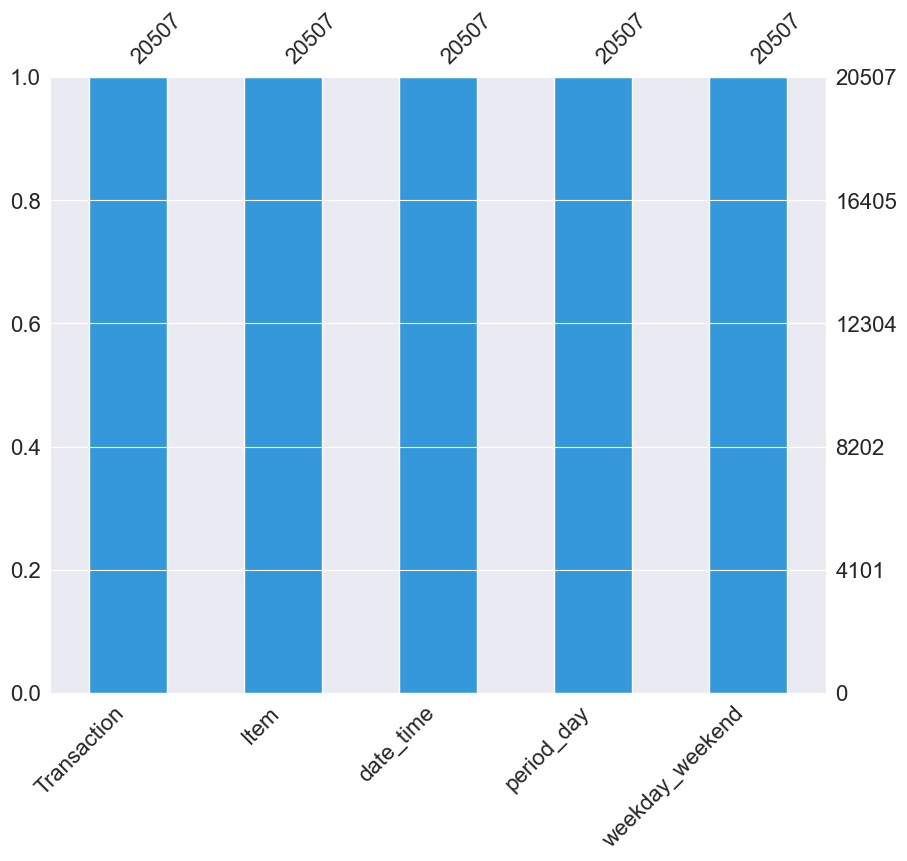

In [9]:
 # Проверим недостающие значения в тестовых данных
msno.bar(data, color="#3498db", figsize=(10, 8))

In [10]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['date'] = data['date_time'].dt.date
data['time'] = data['date_time'].dt.time
data['month'] = data['date_time'].dt.month

C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\2375842367.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'])


In [11]:
data['month'] = data['month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                                      ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                       'September', 'October', 'November', 'December'))
data['day'] = data['date_time'].dt.weekday
data['day'] = data['day'].replace((0, 1, 2, 3, 4, 5, 6),
                                  ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
data['hour'] = data['date_time'].dt.hour
data.drop('date_time', axis=1, inplace=True)
data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,day,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,Sunday,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Sunday,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,Sunday,10


C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\2220787826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coutbyhour['hour'], y=coutbyhour['Transaction'], ax=axs[0, 0], palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\2220787826.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coutbyweekday.index, y=coutbyweekday.values, ax=axs[0, 1], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\2220787826.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coutbydayp['day'], y=coutbydayp['Transactio

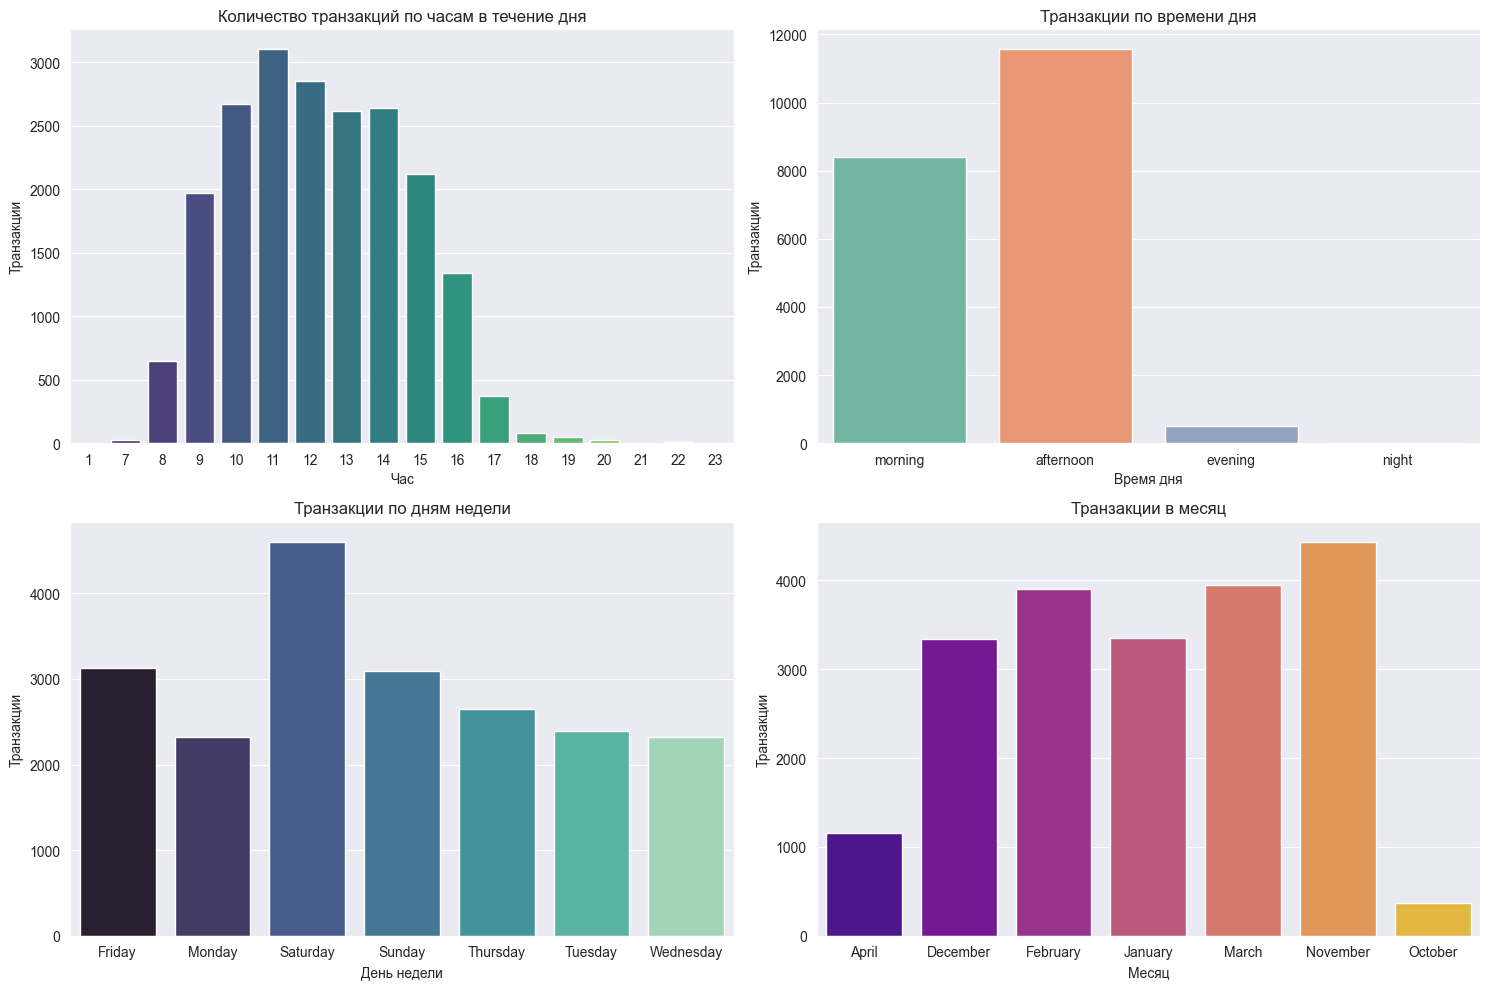

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# График 1: Количество транзакций по часам в течение дня
coutbyhour = data.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour', inplace=True)
sns.barplot(x=coutbyhour['hour'], y=coutbyhour['Transaction'], ax=axs[0, 0], palette='viridis')
axs[0, 0].set(xlabel='Час', ylabel='Транзакции', title='Количество транзакций по часам в течение дня')

# График 2: Транзакции по периодам дня
coutbyweekday = data['period_day'].value_counts().reindex(['morning', 'afternoon', 'evening', 'night'])
sns.barplot(x=coutbyweekday.index, y=coutbyweekday.values, ax=axs[0, 1], palette='Set2')
axs[0, 1].set(xlabel='Время дня', ylabel='Транзакции', title='Транзакции по времени дня')

# График 3: Транзакции по дням недели
coutbydayp = data.groupby('day')['Transaction'].count().reset_index()
coutbydayp.sort_values('day', inplace=True)
sns.barplot(x=coutbydayp['day'], y=coutbydayp['Transaction'], ax=axs[1, 0], palette='mako')
axs[1, 0].set(xlabel='День недели', ylabel='Транзакции', title='Транзакции по дням недели')

# График 4: Транзакции в месяц
coutbymonth = data.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month', inplace=True)
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'], ax=axs[1, 1], palette='plasma')
axs[1, 1].set(xlabel='Месяц', ylabel='Транзакции', title='Транзакции в месяц')

plt.tight_layout()
plt.show()

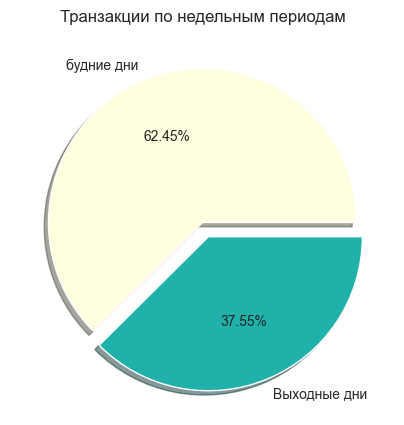

In [15]:
import matplotlib.pyplot as plt

size = [12807, 7700]
labels = "будние дни", "Выходные дни"
colors = ["lightyellow", "lightseagreen"]  # Different color scheme
explode = [0, 0.1]

plt.figure(figsize=(12, 5))
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, autopct="%.2f%%")
plt.xlabel('')
plt.ylabel('')
plt.title('Транзакции по недельным периодам')
plt.show()

**Самый продаваемый продукт**

C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\3063899912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.Item.value_counts().head(20).index, y=data.Item.value_counts().head(20).values, palette='gnuplot')


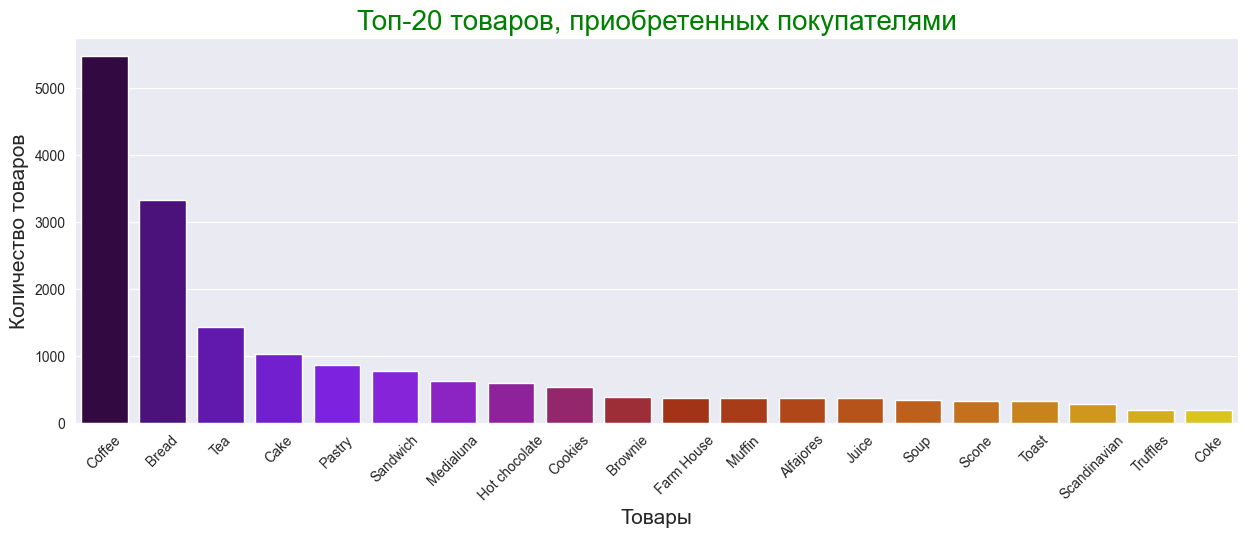

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data.Item.value_counts().head(20).index, y=data.Item.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Товары', size=15)
plt.xticks(rotation=45)
plt.ylabel('Количество товаров', size=15)
plt.title('Топ-20 товаров, приобретенных покупателями', color='green', size=20)
plt.show()

**Априорный алгоритм**

In [17]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from mlxtend.frequent_patterns import association_rules, apriori

transactions = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [19]:
table = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Создадим функцию, которая возвращает 0 или 1
# 0 означает, что элемента не было в этой транзакции, 1 означает, что элемент присутствовал в этой транзакции
def hot_encode(x):
    if (x == 0):
        return 0
    if (x > 0):
        return 1

In [22]:
# Применим функцию к нашему датасету
final_table = table.applymap(hot_encode)
final_table.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\356737417.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_table = table.applymap(hot_encode)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
frequence = apriori(final_table, min_support=0.015, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)

C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
# Теперь создаем правила из часто используемого набора элементов, сгенерированного выше
rules.sort_values('confidence', ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
21,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
14,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
13,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


In [25]:
# Упорядочим данные от самого высокого к самому низкому с точки зрения достоверности
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
21,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
14,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
13,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
